<a href="https://colab.research.google.com/github/sznajder/ON-Minicurso-2022/blob/main/CNN_MNIST_Keras_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

# Trainign batch size 
#batch_size = 128
batch = 20
# Number of training epochs
epochs = 10
# Fraction of the training data to be used as validation
val_split = 0.3
# Learning rate
lr=0.05

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

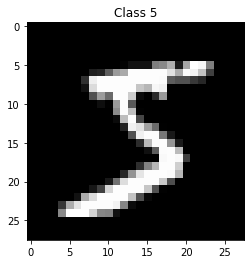

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [ ]:
number_of_classes = 10

Y_train = utils.to_categorical(y_train, number_of_classes)
Y_test = utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [ ]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer
model.add(Flatten())
BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/10
3000/3000 [==============================] - 24s 4ms/step - loss: 0.1007 - accuracy: 0.9692 - val_loss: 0.0341 - val_accuracy: 0.9896
Epoch 2/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0398 - accuracy: 0.9879 - val_loss: 0.0346 - val_accuracy: 0.9889
Epoch 3/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0229 - val_accuracy: 0.9923
Epoch 4/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.0258 - val_accuracy: 0.9921
Epoch 5/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0250 - val_accuracy: 0.9930
Epoch 6/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0220 - val_accuracy: 0.9940
Epoch 7/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0296 - val_ac

In [ ]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0289 - accuracy: 0.9940

Test accuracy:  0.9940000176429749


313/313 [==============================] - 1s 4ms/step - loss: 0.0289 - accuracy: 0.9940
Summary: Loss over the test dataset: 0.03, Accuracy: 0.99


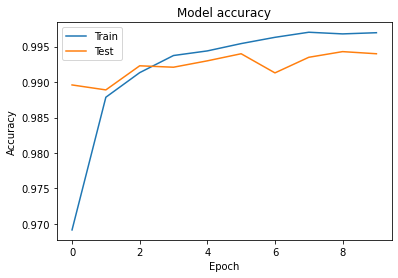

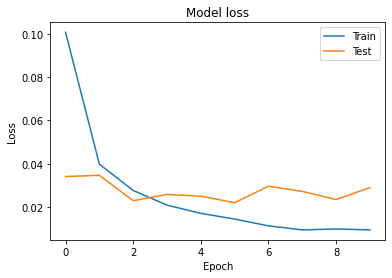

In [ ]:
# Training History Visualization
import matplotlib.pyplot as plt

# Evaluate
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

(10000, 10)


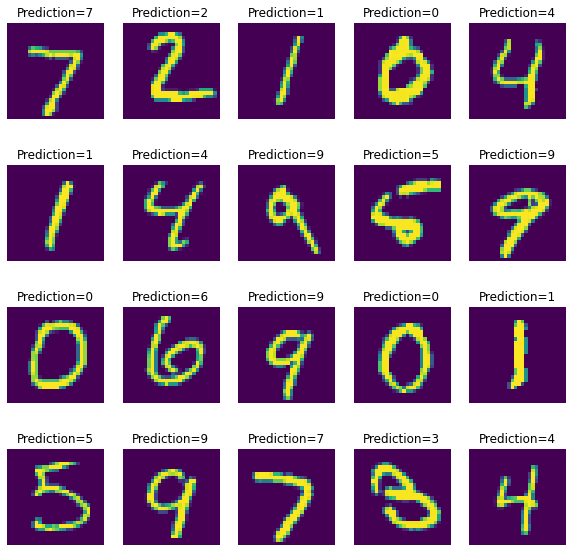

In [ ]:
Nplot = 20
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test) 
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()